In [1]:
import pandas as pd
from modules.preprocessing import TextPreprocessing
from modules.eda import TextExploratory

postags_selected = ['NN', 'NNP', 'NNS', 'JJ', 'RB', 'CD']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruttuc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruttuc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruttuc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ruttuc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ruttuc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
df = pd.read_excel('data/ru_speech_transcripts.xlsx')

In [4]:
df.loc[:, 'processed_text'] = df['Text'].apply(lambda x: TextPreprocessing(x, postags_selected).text)

In [5]:
df

,Indentifier,Person,Date,Occasion,Text,processed_text
0,1,Sergey Lavrov,2022-03-03,Interview with TV Channels,This is a comprehensive question. You have tou...,comprehensive question issue sure world russia...
1,2,Sergey Lavrov,2022-02-25,Answers to Media Questions,"On February 21, having considered requests by ...",february request lugansk president vladimir pu...
2,3,Sergey Lavrov,2022-03-01,UN Human Rights Council,I hoped to be able to attend the Human Rights ...,able attend human right council person twoyear...


In [6]:
eda = TextExploratory(df=df, text_column='processed_text')

In [7]:
mapping = {1: 'Interview with TV Channels', 2: 'Answers to Media Questions', 3: 'UN Human Rights Council'}

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

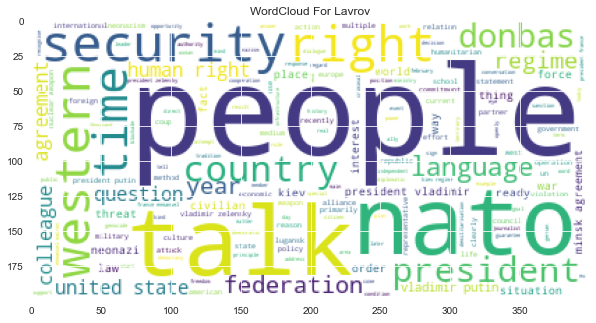

In [11]:
words = ' '.join(df['processed_text'].values)
plt.rcParams['figure.figsize'] = 10, 20
wordcloud = WordCloud(stopwords=['ukraine', 'ukrainian', 'russian', 'russia'],
                    background_color='white',
                    max_words=1000).generate(words)

plt.title('WordCloud For {}'.format('Lavrov'))
plt.imshow(wordcloud)

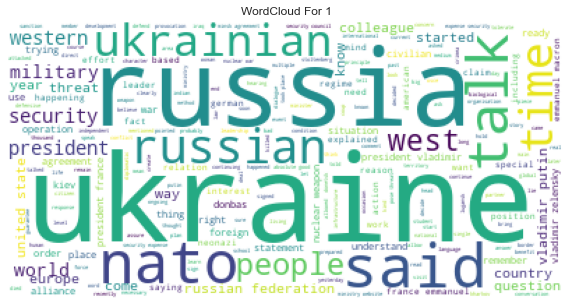

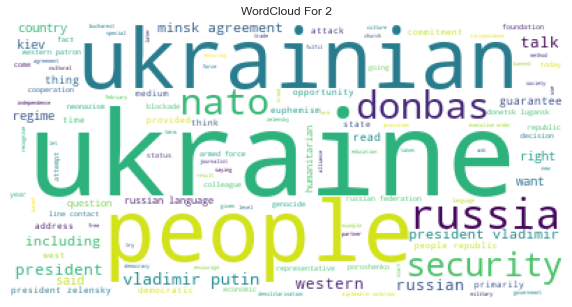

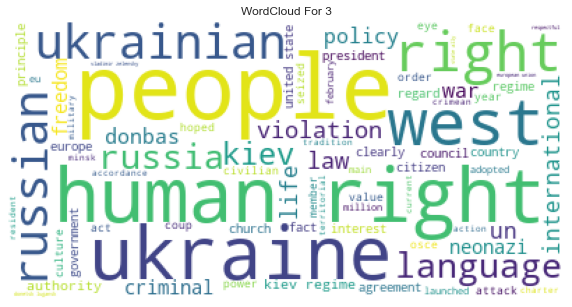

In [7]:
for category, target in mapping.items():
    eda.plot_wordcloud('processed_text', category, target)